In [43]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import pylab 
import scipy.stats as stats

In [643]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import math

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from spacy.parts_of_speech import ADV
from spacy.en import English
parser = English()

In [765]:
#Constants
TAGS = ['ADJ', 'ADV', 'ADP', 'CONJ', 'DET', 'NOUN', 'NUM', 'PUNCT']

In [766]:
movies = pd.read_csv("movies.csv")

In [767]:
def title_pos(title):
    p_title = parser(title.decode('utf-8'))
    tokencount = {}
    for token in p_title:
        tokencount[token.pos_] = tokencount.get(token.pos_,0) + 1
    return tokencount

In [768]:
movies['POS'] = map(lambda x: title_pos(x),movies['Title'])

In [769]:
movies['Total Gross'] = map(lambda x: x.translate(None, string.punctuation),movies['Total Gross'])
movies['Total Gross'] = movies['Total Gross'].replace('n/a',np.nan)
movies['Total Gross'] = movies['Total Gross'].replace('na', np.nan)
movies = movies[movies['Total Gross'].notnull()]

In [770]:
movies['Total Gross'] = map(lambda x: int(x),movies['Total Gross'])

In [771]:
def column_to_int(df,col):
    df[col] = map(lambda x: x.translate(None, string.punctuation),df[col])
    df[col] = df[col].replace('n/a',np.nan)
    df[col] = df[col].replace('na', np.nan)
    df = df[df[col].notnull()]
    df[col] = map(lambda x: int(x),df[col])
    return df

In [772]:
for tag in TAGS:
    movies[tag] = map(lambda x: x.get(tag,0),movies['POS'])

In [773]:
movies = column_to_int(movies,'TTheaters')

In [780]:
movies['Total Gross Log'] = map(lambda x:math.log(x,10), movies['Total Gross'])

In [45]:
def fit(x,y):
    rgr = LinearRegression()
    rgr.fit(x.values, y)
    return rgr

def score(rgr, X_test, y_test):
    return np.mean((rgr.predict(X_test) - y_test)**2)

def plot_stuff(model,feature,indx):
    b = model.intercept_
    m = model.coef_
    x = range(10)
    plt.scatter(X_test[feature],model.predict(X_test),alpha=.05)
    plt.scatter(X_test[feature],y_test,alpha=.01, color='red')
    plt.plot(x,map(lambda a: m[indx]*a+b,x))
    plt.xlabel(feature)
    
def plot_movies(features,model,X_test,y_test):
    '''
    features - list of features
    model - regression object
    X_test - x values
    Y_test - y_values
    '''
    fig, axes = plt.subplots(len(features),1,figsize=(7,20))
    plt.subplots_adjust(hspace=.5)
    for feature in features:
        b = model.intercept_
        m = model.coef_
        #x = range(int(max(X_test[feature])))
        x=np.linspace(min(X_test[feature]),max(X_test[feature]),40)
        axes[features.index(feature)].scatter(X_test[feature],model.predict(X_test),alpha=.05,label='Predicted')
        axes[features.index(feature)].scatter(X_test[feature],y_test,alpha=.01, color='red',label='Actual')
        axes[features.index(feature)].plot(x,map(lambda a: m[features.index(feature)]*a+b,x))
        axes[features.index(feature)].set_xlabel("{f} Beta: {b}".format(f=feature,b=m[features.index(feature)]))
        axes[features.index(feature)].set_ylabel('Log of Total Gross')
        axes[features.index(feature)].set_title(feature + ' vs. Log of Total Gross')
        axes[features.index(feature)].legend(loc='best')

# USING P-VALUES TO FIT
# DIDN'T USE THIS SECTION

In [ ]:
pos = movies[['ADJ', 'ADV', 'ADP', 'CONJ', 'DET', 'NOUN', 'NUM', 'PUNCT']]
# pos = pd.concat([pos,movies['TTheaters']],axis=1)

In [ ]:
import statsmodels.api as sm
pos = sm.add_constant(pos)
model = sm.OLS(movies['Total Gross Log'], pos)
results = model.fit()

In [ ]:
results.summary()

In [ ]:
del(pos['CONJ'])
model = sm.OLS(movies['Total Gross Log'], pos)
results = model.fit()
results.summary()

In [ ]:
del(pos['NOUN'])
model = sm.OLS(movies['Total Gross Log'], pos)
results = model.fit()
results.summary()

In [ ]:
del(pos['ADJ'])
model = sm.OLS(movies['Total Gross Log'], pos)
results = model.fit()
results.summary()

In [ ]:
del(pos['PUNCT'])
model = sm.OLS(movies['Total Gross Log'], pos)
results = model.fit()
results.summary()

# First Conclusions
# DIDN'T USE THIS SECTION

Logs ~ ADV, ADP, DET, NUM are significant predictors PUNCT is borderline

In [44]:
# ['ADJ', 'ADV', 'ADP', 'CONJ', 'DET', 'NOUN', 'NUM', 'PUNCT']
x = movies[['ADP', 'DET', 'ADV', 'NUM']]
y = movies['Total Gross Log']   

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [47]:
print score(fit(X_train, y_train), X_test, y_test)

10.147649297


In [48]:
print score(fit(X_train, y_train), X_train, y_train)

10.4560239109


In [49]:
model = fit(X_train,y_train)
residuals = model.predict(X_test)-y_test

(array([ 124.,  856.,  915.,  670.,  745.,  825.,  672.,  291.,   58.,    2.]),
 array([-6.71837007, -5.09613029, -3.4738905 , -1.85165072, -0.22941094,
         1.39282885,  3.01506863,  4.63730842,  6.2595482 ,  7.88178798,
         9.50402777]),
 <a list of 10 Patch objects>)

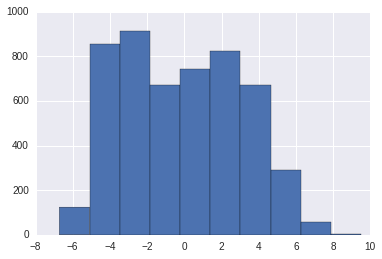

In [50]:
plt.hist(residuals)

((array([-3.64369888, -3.4088646 , -3.27946035, ...,  3.27946035,
          3.4088646 ,  3.64369888]),
  array([-6.71837007, -6.33577171, -6.3021623 , ...,  7.8326589 ,
          8.89125642,  9.50402777])),
 (3.1289067920833125, -0.13340094904405378, 0.98244708706108297))

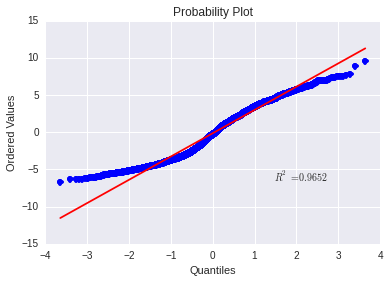

In [51]:

stats.probplot(residuals, dist="norm", plot=pylab)

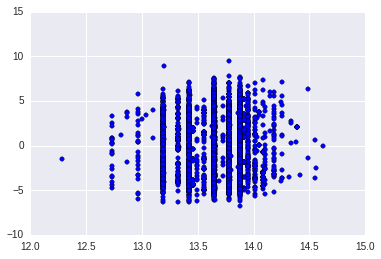

In [52]:
plt.scatter(model.predict(X_test),residuals)

In [54]:
#['ADP', 'DET', 'NOUN', 'PUNCT','TTheaters']
features = ['ADP', 'DET', 'ADV', 'NUM']

In [55]:
plot_movies(movies,features,model,X_test,y_test)

TypeError: plot_movies() takes exactly 4 arguments (5 given)

In [ ]:
model.coef_

# DIFFERENT INFERIOR MODELS
# DIDN'T USE THIS SECTION

In [ ]:
big_movies = movies[movies['Total Gross Log'] >= 12]

In [ ]:
y = big_movies['Total Gross Log']
x = big_movies[['ADV', 'ADP', 'DET', 'NUM']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model = fit(X_train,y_train)
residuals = model.predict(X_test)-y_test

In [ ]:
plt.hist(residuals)

In [ ]:
stats.probplot(residuals, dist="norm", plot=pylab)

In [ ]:
plt.scatter(model.predict(X_test),residuals)

In [ ]:
plt.hist(movies['Total Gross Log'])

In [ ]:
model.coef_

# RIDGE REGRESSION
# DIDN'T USE THIS SECTION

In [103]:
from sklearn.linear_model import Ridge

In [104]:
y = movies['Total Gross Log']
x = movies[TAGS]

In [105]:
def fit_ridge(x,y,alph):
    ridge = Ridge(alpha = alph)
    ridge.fit(x.values,y)
    return ridge

def test_ridge(x,y,alph,runs):
    '''
    x - independent data set
    y - dependent data 1-d
    alph - ridge regression lambda
    runs - number of attempts
    '''
    scores = []
    for _ in range(runs):
        #Split Data
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
        
        #Normalize Data
        avg = X_train.mean()
        big = X_train.max()
        small = X_train.min()
        X_train = (X_train - avg)/(big - small)
        X_test = (X_test - avg)/(big - small)
        
        rgr = fit_ridge(X_train,y_train,1)
        scores.append((score(rgr,X_train,y_train),score(rgr,X_test,y_test),score(rgr,X_test,y_test)-score(rgr,X_train,y_train)))
    return [np.mean(x) for x in zip(*scores)]

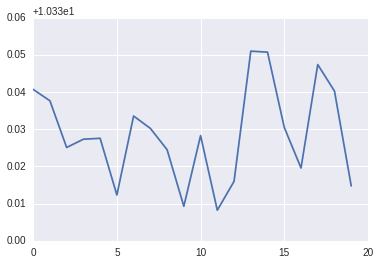

In [106]:
a= [test_ridge(x,y,runs,50) for runs in np.linspace(0,10,20)]
plt.plot([a[i][1] for i in range(len(a))])
#Lambda = roughly 5

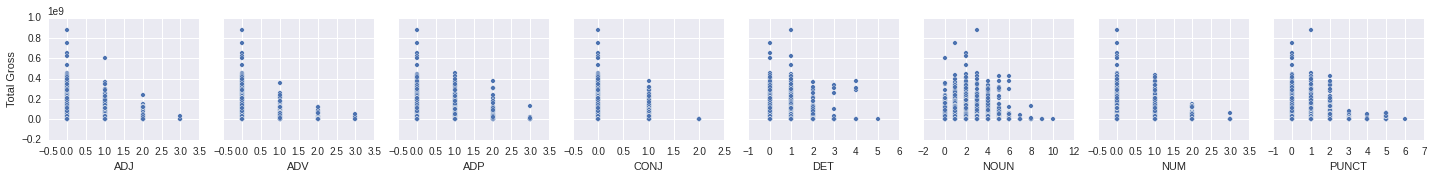

In [107]:
sns.pairplot(movies, x_vars = TAGS,y_vars=['Total Gross'])

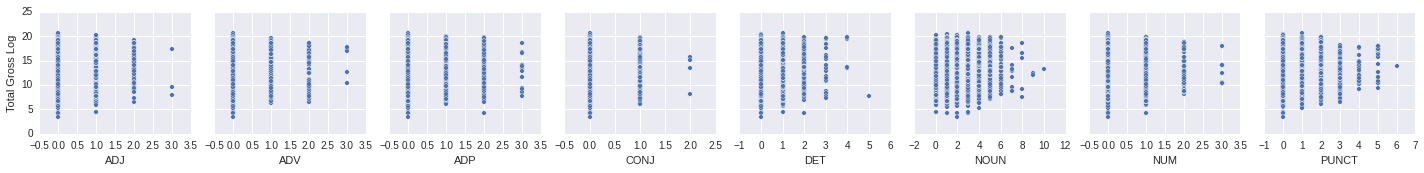

In [108]:
sns.pairplot(movies, x_vars = TAGS,y_vars=['Total Gross Log'])

In [110]:
x_norm = (x-x.mean())/(x.max()-x.min())

rgr = fit_ridge(x_norm,y,5)

rgr.score(x_norm,y)

0.0053784432987209474

In [111]:
residuals = rgr.predict(x_norm)-y

((array([-3.91957884, -3.70033666, -3.58023444, ...,  3.58023444,
          3.70033666,  3.91957884]),
  array([ -6.75840145,  -6.72959959,  -6.70102412, ...,   9.37329025,
           9.57534997,  10.29415042])),
 (3.160856561103631, -7.8463819383513968e-16, 0.98237432351269538))

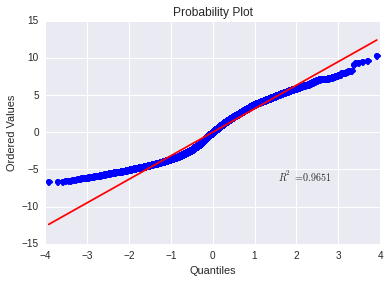

In [112]:
import pylab 
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)

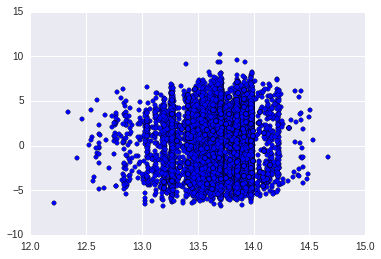

In [113]:
plt.scatter(rgr.predict(x_norm),residuals)

(array([  371.,  2713.,  2813.,  2129.,  2325.,  2490.,  2011.,   671.,
           99.,     6.]),
 array([ -6.75840145,  -5.05314626,  -3.34789107,  -1.64263588,
          0.0626193 ,   1.76787449,   3.47312968,   5.17838486,
          6.88364005,   8.58889524,  10.29415042]),
 <a list of 10 Patch objects>)

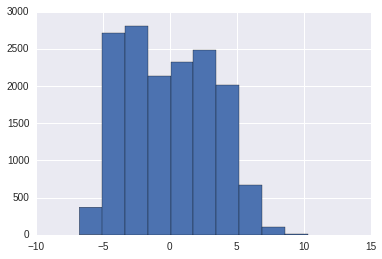

In [114]:
plt.hist(residuals)

In [115]:
TAGS

['ADJ', 'ADV', 'ADP', 'CONJ', 'DET', 'NOUN', 'NUM', 'PUNCT']

In [116]:
zip(rgr.coef_,TAGS)

[(-0.21003343331528226, 'ADJ'),
 (0.68830624031421717, 'ADV'),
 (-1.2787406569899931, 'ADP'),
 (-0.062967876839414155, 'CONJ'),
 (1.4059073282135479, 'DET'),
 (-0.10324504950420824, 'NOUN'),
 (0.43903134464132809, 'NUM'),
 (-0.43562585931360592, 'PUNCT')]

Logs ~ ADV, ADP, DET, NUM are significant predictors PUNCT is borderline

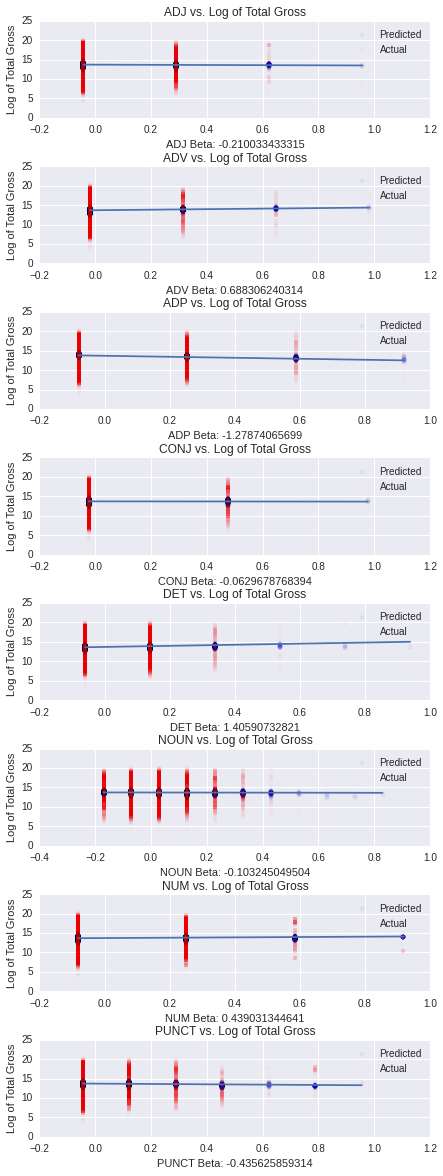

In [117]:
plot_movies(TAGS,rgr,x_norm,y)

# ANOTHER ONE THAT I DIDN'T USE

In [118]:
y = movies['Total Gross Log']
NEW_TAGS = TAGS+['TTheaters']
x = movies[NEW_TAGS]

In [119]:
a= [test_ridge(x,y,runs,50) for runs in np.linspace(0,10,20)]

In [ ]:
a

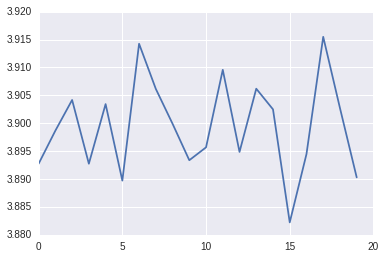

In [120]:
plt.plot([a[i][1] for i in range(len(a))])

In [121]:
x_norm = (x-x.mean())/(x.max()-x.min())

rgr = fit_ridge(x_norm,y,6)

rgr.score(x_norm,y)

0.62557653401942148

In [122]:
residuals = rgr.predict(x_norm)-y

((array([-3.91957884, -3.70033666, -3.58023444, ...,  3.58023444,
          3.70033666,  3.91957884]),
  array([-6.21443634, -6.08672774, -6.06292249, ...,  7.65240266,
          7.66984918,  8.60791411])),
 (1.9675131609484591, -5.7629301214135543e-16, 0.99663759358179116))

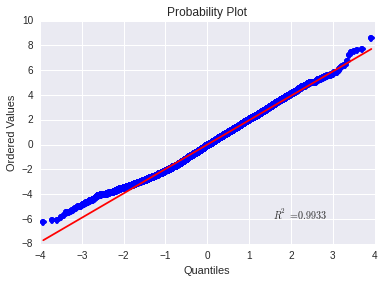

In [123]:
stats.probplot(residuals, dist="norm", plot=pylab)

In [124]:
zip(rgr.coef_,NEW_TAGS)

[(-0.34477369808550373, 'ADJ'),
 (-0.11280677017881587, 'ADV'),
 (-0.32470985027085414, 'ADP'),
 (-0.2858262296800046, 'CONJ'),
 (-0.12674452813641718, 'DET'),
 (0.42764320767531638, 'NOUN'),
 (-0.42591963827595963, 'NUM'),
 (0.14496553978534665, 'PUNCT'),
 (10.201482107942663, 'TTheaters')]

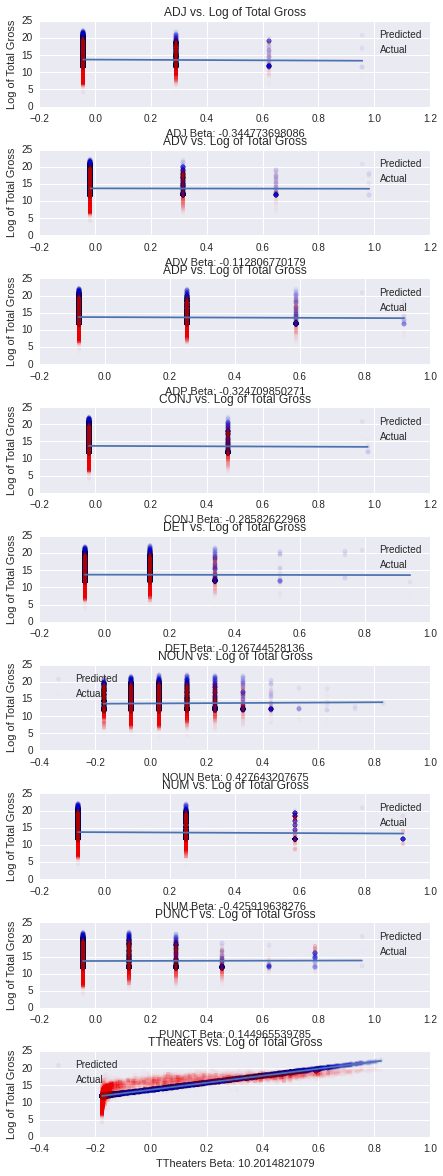

In [125]:
plot_movies(NEW_TAGS,rgr,x_norm,y)

# BINNING THE NUMBER OF THEATERS THE MOVIE IS RELEASED IN
# I USED THIS ONE

In [781]:
from sklearn.preprocessing import PolynomialFeatures, normalize

In [785]:
#Create Dummies Avoid Dummy Trap
movies['Wide Release']=0
movies['Wide Release'][movies['TTheaters']>1000]=1
movies['Mid Release']=0
movies['Mid Release'][(movies['TTheaters']<=1000) & (movies['TTheaters']>20)] = 1
movies['Low Release']=0
movies['Low Release'][movies['TTheaters']<=20] = 1

In [786]:
garb = movies
garb['GRAPH'] = garb['Wide Release']*3
garb['GRAPH'] = garb['GRAPH']+ garb['Mid Release'] *2
garb['GRAPH'] = garb['GRAPH']+ garb['Low Release']

In [787]:
ax = sns.jointplot(garb['GRAPH'], garb['Total Gross Log'],stat_func=None, kind='reg', color="seagreen")
ax.set_axis_labels('Theater Bin','Total Gross Log')

In [788]:
y = movies['Total Gross Log']
NEW_TAGS = TAGS+['Wide Release','Mid Release']
x_pre = movies[NEW_TAGS]
poly = PolynomialFeatures(degree=2,interaction_only=True)
x = normalize(poly.fit_transform(x_pre).astype(np.float))

In [789]:
import itertools

In [790]:
all_tags = list(itertools.product(NEW_TAGS,NEW_TAGS))
all_tags = [(a,b) for (a,b) in all_tags if a!=b]
all_tags = ['1']+NEW_TAGS+list(itertools.combinations(NEW_TAGS,2))

In [791]:
def fit_poly(x,y,alph):
    ridge = Ridge(alpha = alph)
    ridge.fit(x,y)
    return ridge

In [792]:
def test_poly(x,y,alph,runs):
    '''
    x - independent data set
    y - dependent data 1-d
    alph - ridge regression lambda
    runs - number of attempts
    '''
    scores = []
    for _ in range(runs):
        #Split Data
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
        
#         #Normalize Data
#         avg = X_train.mean()
#         big = X_train.max()
#         small = X_train.min()
#         X_train = (X_train - avg)/(big - small)
#         X_test = (X_test - avg)/(big - small)
        
        rgr = fit_poly(X_train,y_train,1)
        scores.append(score(rgr,X_test,y_test))
    return np.mean(scores)

In [793]:
a= [test_poly(x,y,runs,20) for runs in np.linspace(0,50,50)]

In [794]:
plt.plot(np.linspace(0,50,50),a)

In [795]:
rgr = fit_poly(x,y,10)

rgr.score(x,y)

0.77551593421907461

In [796]:
residuals = rgr.predict(x)-y

In [797]:
stats.probplot(residuals, dist="norm", plot=pylab)

((array([-3.91957884, -3.70033666, -3.58023444, ...,  3.58023444,
          3.70033666,  3.91957884]),
  array([-2.76639554, -2.55877749, -2.47189591, ...,  2.76173607,
          2.94953674,  3.24259603])),
 (0.66324684518658183, 3.7770117249755689e-14, 0.99907771111571408))

In [798]:
from sklearn import feature_selection

In [799]:
y =y.astype(np.float)

In [800]:
ga,pvals = feature_selection.f_regression(x,y)

In [801]:
print len(rgr.coef_),len(all_tags)

56 56


In [802]:
[(i,j) for i,j in zip(pvals,betas) if i < .05]

[(1.3540419679265814e-157, (-2.4729131723050872, '1')),
 (2.8813751523869632e-05, (-1.4518479700844396, 'ADJ')),
 (1.6224162244909431e-28, (-1.6327403701776615, 'ADP')),
 (0.033014387220415865, (-0.20933787683520469, 'CONJ')),
 (0.013261696067620031, (-1.9170262103655511, 'DET')),
 (2.627044023172783e-187, (-2.6203909862177808, 'NOUN')),
 (3.2266464145747972e-06, (-1.8860280757469827, 'NUM')),
 (2.0452644167802165e-11, (-2.5250718029346522, 'PUNCT')),
 (0.0, (5.6915794743222854, 'Wide Release')),
 (1.351833414019761e-18, (3.0497051300971978, 'Mid Release')),
 (3.0363755414263722e-08, (-0.49383683782011345, ('ADJ', 'ADP'))),
 (0.0047649665415577672, (-0.84870465039189513, ('ADJ', 'DET'))),
 (8.1277102787759475e-07, (-0.11196289564307615, ('ADJ', 'NOUN'))),
 (0.029242704035666065, (0.82834577273343324, ('ADJ', 'NUM'))),
 (0.019076545180422153, (-0.49695980343933438, ('ADJ', 'PUNCT'))),
 (1.0773526310545856e-149, (3.8283832224579055, ('ADJ', 'Wide Release'))),
 (0.0045518362898989088, (1.

In [803]:
betas = zip(rgr.coef_,all_tags)

In [804]:
def beta_filter(bs,label):
    filtered = []
    for b in bs:
        if (b[1] == label):
            filtered.append(b)
        else:
            try:
                if (b[1][0] == label) or (b[1][1] == label):
                    filtered.append(b)
            except:
                pass
    return filtered
            

In [805]:
def plot_bees(b,title):
#     b = sorted(b)
    b_x, tags = zip(*b)
    b_x,b_y =zip(*enumerate(b_x))
    ax = sns.barplot(b_x,b_y,order=b_x,palette='muted')
    ax.set_title(title)
    ax.set_xticks([])

In [806]:
def merge_label(BHH):
    AHH = []
    for j in BHH:
        if type(j[1]) == tuple:
            AHH.append((j[0],j[1][0]))
        else:
            AHH.append(j)
    return AHH

In [807]:
g = sns.barplot(x=AHH,y=rgr.coef_,order=AHH,palette='muted')
g.set_xticks([])


[]

In [808]:
gfx_w = merge_label(beta_filter(betas,'Wide Release'))[:-1]

In [809]:
gfx_m = merge_label(beta_filter(betas,'Mid Release'))[:-1]

In [810]:
plot_bees(merge_label(beta_filter(betas,'DET'))[:-2],'Noun')

In [811]:
plot_bees(gfx_m)

TypeError: plot_bees() takes exactly 2 arguments (1 given)

In [812]:
w,_ = zip(*beta_filter(betas,'Wide Release')[1:9])

In [813]:
m,_ = zip(*beta_filter(betas,'Mid Release')[1:9])

In [814]:
s,_ = zip(*betas[1:9])

In [815]:
s

(-0.630529561970126,
 -0.40795558716854441,
 -0.70909013314882274,
 -0.090914284762856595,
 -0.8325539048256454,
 -1.1380213457434925,
 -0.8190915860115634,
 -1.096624750423997)

In [816]:
gfx_tag =[j for i,j in betas[1:9]]

In [817]:
[i+j for i,j in zip(w,s)]

[1.0321161461543551,
 0.72574505437265435,
 1.2269136253189235,
 0.85603082321417256,
 1.0865096147941409,
 1.8991574066885677,
 1.6767464069092819,
 1.5898809205770599]

In [818]:
[i+j for i,j in zip(m,s)]

[0.1434667403937776,
 0.1287361621890315,
 0.41561883200454741,
 0.28273577595210686,
 0.25979186043787261,
 0.17950024256254005,
 0.033027061484604769,
 -0.0051509922001111708]

In [819]:
gfx = sns.barplot(gfx_tag,s,order=gfx_tag,palette='muted')
gfx.set_title('Low Release')

In [510]:
list(enumerate(betas))

[(0, (-2.4729131723051032, '1')),
 (1, (-1.4518479700844213, 'ADJ')),
 (2, (-0.93935245361788, 'ADV')),
 (3, (-1.6327403701775967, 'ADP')),
 (4, (-0.20933787683519903, 'CONJ')),
 (5, (-1.9170262103655638, 'DET')),
 (6, (-2.6203909862178416, 'NOUN')),
 (7, (-1.8860280757469852, 'NUM')),
 (8, (-2.5250718029346566, 'PUNCT')),
 (9, (5.691579474322273, 'Wide Release')),
 (10, (3.0497051300971321, 'Mid Release')),
 (11, (-0.015471548121014578, ('ADJ', 'ADV'))),
 (12, (-0.49383683782014759, ('ADJ', 'ADP'))),
 (13, (-0.14796160551213094, ('ADJ', 'CONJ'))),
 (14, (-0.84870465039190224, ('ADJ', 'DET'))),
 (15, (-0.1119628956430684, ('ADJ', 'NOUN'))),
 (16, (0.828345772733451, ('ADJ', 'NUM'))),
 (17, (-0.49695980343936397, ('ADJ', 'PUNCT'))),
 (18, (3.82838322245781, ('ADJ', 'Wide Release'))),
 (19, (1.7821923478556387, ('ADJ', 'Mid Release'))),
 (20, (0.31868390022007104, ('ADV', 'ADP'))),
 (21, (-0.26765015906984135, ('ADV', 'CONJ'))),
 (22, (-0.045990683040479499, ('ADV', 'DET'))),
 (23, (-0.4

In [692]:
best_b = [(i,j) for i,j in betas if (i > .7) or (i <-1) ]

In [512]:
sorted(betas[11:], key = lambda x: x[1][1])

[(-0.49383683782014759, ('ADJ', 'ADP')),
 (0.31868390022007104, ('ADV', 'ADP')),
 (-0.015471548121014578, ('ADJ', 'ADV')),
 (-0.14796160551213094, ('ADJ', 'CONJ')),
 (-0.26765015906984135, ('ADV', 'CONJ')),
 (-0.11476640435953628, ('ADP', 'CONJ')),
 (-0.84870465039190224, ('ADJ', 'DET')),
 (-0.045990683040479499, ('ADV', 'DET')),
 (0.31757689882243895, ('ADP', 'DET')),
 (0.040516216413524021, ('CONJ', 'DET')),
 (1.7821923478556387, ('ADJ', 'Mid Release')),
 (1.2357784216036778, ('ADV', 'Mid Release')),
 (2.5897380971189805, ('ADP', 'Mid Release')),
 (0.86036105979859412, ('CONJ', 'Mid Release')),
 (2.5152190754909372, ('DET', 'Mid Release')),
 (3.0337055689312415, ('NOUN', 'Mid Release')),
 (1.9620756951868881, ('NUM', 'Mid Release')),
 (2.5132112050804905, ('PUNCT', 'Mid Release')),
 (-2.9576924662730212e-24, ('Wide Release', 'Mid Release')),
 (-0.1119628956430684, ('ADJ', 'NOUN')),
 (-0.40038433715290267, ('ADV', 'NOUN')),
 (-0.52360658277549399, ('ADP', 'NOUN')),
 (-0.30264757518001

In [693]:
best_b

[(-2.4729131723050872, '1'),
 (-1.4518479700844396, 'ADJ'),
 (-1.6327403701776615, 'ADP'),
 (-1.9170262103655511, 'DET'),
 (-2.6203909862177808, 'NOUN'),
 (-1.8860280757469827, 'NUM'),
 (-2.5250718029346522, 'PUNCT'),
 (5.6915794743222854, 'Wide Release'),
 (3.0497051300971978, 'Mid Release'),
 (0.82834577273343324, ('ADJ', 'NUM')),
 (3.8283832224579055, ('ADJ', 'Wide Release')),
 (1.7821923478556598, ('ADJ', 'Mid Release')),
 (2.6104421971304368, ('ADV', 'Wide Release')),
 (1.2357784216036687, ('ADV', 'Mid Release')),
 (4.4578133942285323, ('ADP', 'Wide Release')),
 (2.589738097118933, ('ADP', 'Mid Release')),
 (2.1804216895117841, ('CONJ', 'Wide Release')),
 (0.860361059798605, ('CONJ', 'Mid Release')),
 (4.418807052785283, ('DET', 'Wide Release')),
 (2.5152190754909753, ('DET', 'Mid Release')),
 (6.9933625201078131, ('NOUN', 'Wide Release')),
 (3.0337055689311785, ('NOUN', 'Mid Release')),
 (5.7468793570275105, ('NUM', 'Wide Release')),
 (1.9620756951868967, ('NUM', 'Mid Release')),

# ONE MORE TIME

In [149]:
#Create Dummies Avoid Dummy Trap
movies['Wide Release']=0
movies['Wide Release'][movies['TTheaters']>2000]=1
movies['Mid Release']=0
movies['Mid Release'][(movies['TTheaters']<=2000) & (movies['TTheaters']>1000)] = 1
movies['Low Release']=0
movies['Low Release'][movies['TTheaters']<=1000] = 1

In [150]:
y = movies['Total Gross Log']
NEW_TAGS = TAGS+['Wide Release','Mid Release','Low Release']
x_pre = movies[NEW_TAGS]
poly = PolynomialFeatures(degree=2,interaction_only=True)
x = poly.fit_transform(x_pre)

In [151]:
all_tags = list(itertools.product(NEW_TAGS,NEW_TAGS))
all_tags = [(a,b) for (a,b) in all_tags if a!=b]
all_tags = ['1']+NEW_TAGS+list(itertools.combinations(NEW_TAGS,2))

In [152]:
a= [test_poly(x,y,runs,50) for runs in np.linspace(0,10,20)]

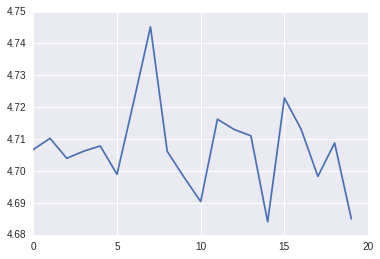

In [153]:
plt.plot([a[i][1] for i in range(len(a))])

In [156]:
x_norm = (x-x.mean())/(x.max()-x.min())

rgr = fit_poly(x_norm,y,6)

rgr.score(x_norm,y)

0.49426998588700821

In [157]:
residuals = rgr.predict(x_norm)-y

((array([-3.91957884, -3.70033666, -3.58023444, ...,  3.58023444,
          3.70033666,  3.91957884]),
  array([-7.26779675, -6.84823034, -6.44342262, ...,  8.50121684,
          8.52542414,  9.12517594])),
 (2.2784793733757551, 2.4161119106323476e-14, 0.99308605898581892))

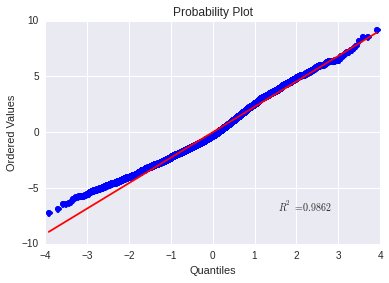

In [158]:
stats.probplot(residuals, dist="norm", plot=pylab)

In [159]:
print len(rgr.coef_),len(all_tags)

67 67


In [160]:
betas = zip(rgr.coef_,all_tags)

In [161]:
betas

[(-5.3283498547216036e-26, '1'),
 (0.040696082538333539, 'ADJ'),
 (0.40077798407015702, 'ADV'),
 (-1.1120624619620623, 'ADP'),
 (-0.13921446275464594, 'CONJ'),
 (0.60377187089470175, 'DET'),
 (6.3206970211848343, 'NOUN'),
 (0.4965375949513437, 'NUM'),
 (-1.2155857991852572, 'PUNCT'),
 (19.094229795754504, 'Wide Release'),
 (10.005507752031249, 'Mid Release'),
 (-29.099737547786212, 'Low Release'),
 (-0.12549293186698607, ('ADJ', 'ADV')),
 (-0.32417155976650142, ('ADJ', 'ADP')),
 (-0.012693033684544264, ('ADJ', 'CONJ')),
 (-0.50282628851940159, ('ADJ', 'DET')),
 (-0.44550061850803679, ('ADJ', 'NOUN')),
 (0.45090984387787031, ('ADJ', 'NUM')),
 (-0.59604867726173016, ('ADJ', 'PUNCT')),
 (3.2056369241420399, ('ADJ', 'Wide Release')),
 (1.6799159687337217, ('ADJ', 'Mid Release')),
 (-4.8448568103374354, ('ADJ', 'Low Release')),
 (-0.016392553076295582, ('ADV', 'ADP')),
 (0.075472512015389084, ('ADV', 'CONJ')),
 (-0.075487623291572201, ('ADV', 'DET')),
 (-0.17714036699381458, ('ADV', 'NOUN')

In [162]:
best_b = [(x,y) for x,y in betas if (x > 1 or x <-1) ]

In [163]:
best_b

[(-1.1120624619620623, 'ADP'),
 (6.3206970211848343, 'NOUN'),
 (-1.2155857991852572, 'PUNCT'),
 (19.094229795754504, 'Wide Release'),
 (10.005507752031249, 'Mid Release'),
 (-29.099737547786212, 'Low Release'),
 (3.2056369241420399, ('ADJ', 'Wide Release')),
 (1.6799159687337217, ('ADJ', 'Mid Release')),
 (-4.8448568103374354, ('ADJ', 'Low Release')),
 (1.4357515066466187, ('ADV', 'Wide Release')),
 (-2.0101090516132438, ('ADV', 'Low Release')),
 (1.1487904431287268, ('ADP', 'Wide Release')),
 (-3.1763781246413112, ('ADP', 'Low Release')),
 (1.6799810119919751, ('DET', 'NOUN')),
 (3.1644900325136258, ('DET', 'Wide Release')),
 (1.4355699849792871, ('DET', 'Mid Release')),
 (-3.996288146598181, ('DET', 'Low Release')),
 (2.3608203172331748, ('NOUN', 'NUM')),
 (1.8705534451065264, ('NOUN', 'PUNCT')),
 (15.647790508589649, ('NOUN', 'Wide Release')),
 (9.0843430604593465, ('NOUN', 'Mid Release')),
 (-18.411436547863559, ('NOUN', 'Low Release')),
 (6.684089814298634, ('NUM', 'Wide Release')

# LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
y = movies['Total Gross Log']
x = movies[TAGS]

In [ ]:
def fit_ridge(x,y,alph):
    ridge = Ridge(alpha = alph)
    ridge.fit(x.values,y)
    return ridge

def test_ridge(x,y,alph,runs):
    '''
    x - independent data set
    y - dependent data 1-d
    alph - ridge regression lambda
    runs - number of attempts
    '''
    scores = []
    for _ in range(runs):
        #Split Data
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
        
        #Normalize Data
        X_train = X_train/X_train.max()
        X_test = X_test/X_train.max()
        
        rgr = fit_ridge(X_train,y_train,1)
        scores.append((score(rgr,X_train,y_train),score(rgr,X_test,y_test),score(rgr,X_test,y_test)-score(rgr,X_train,y_train)))
    return [np.mean(x) for x in zip(*scores)]

In [ ]:
a= [test_ridge(x,y,runs,20) for runs in np.linspace(0,10,20)]
plt.plot([a[x][1] for x in range(len(a))])
#Lambda = roughly 7

In [ ]:
movies